In [92]:
# %pip install pandas
# %pip install matplotlib
# %pip install imbalanced-learn

In [93]:
# from google.colab import files
# uploaded = files.upload()

In [94]:
import pandas as pd
import matplotlib.pyplot as plt

In [95]:
wine_data = pd.read_csv('..\..\Data\winequalityN.csv')
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [96]:
wine_data.head(5)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [97]:
print("Number of NA values per column:\n-------------------------------------")
for column in wine_data.columns:
    count_nulls = wine_data[column].isna().sum()
    print(f'{column}: {count_nulls}')

Number of NA values per column:
-------------------------------------
type: 0
fixed acidity: 10
volatile acidity: 8
citric acid: 3
residual sugar: 2
chlorides: 2
free sulfur dioxide: 0
total sulfur dioxide: 0
density: 0
pH: 9
sulphates: 4
alcohol: 0
quality: 0


In [98]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [99]:
# Handle missing values by filling them with the mean of each column
wine_data = wine_data.fillna(wine_data.mean())

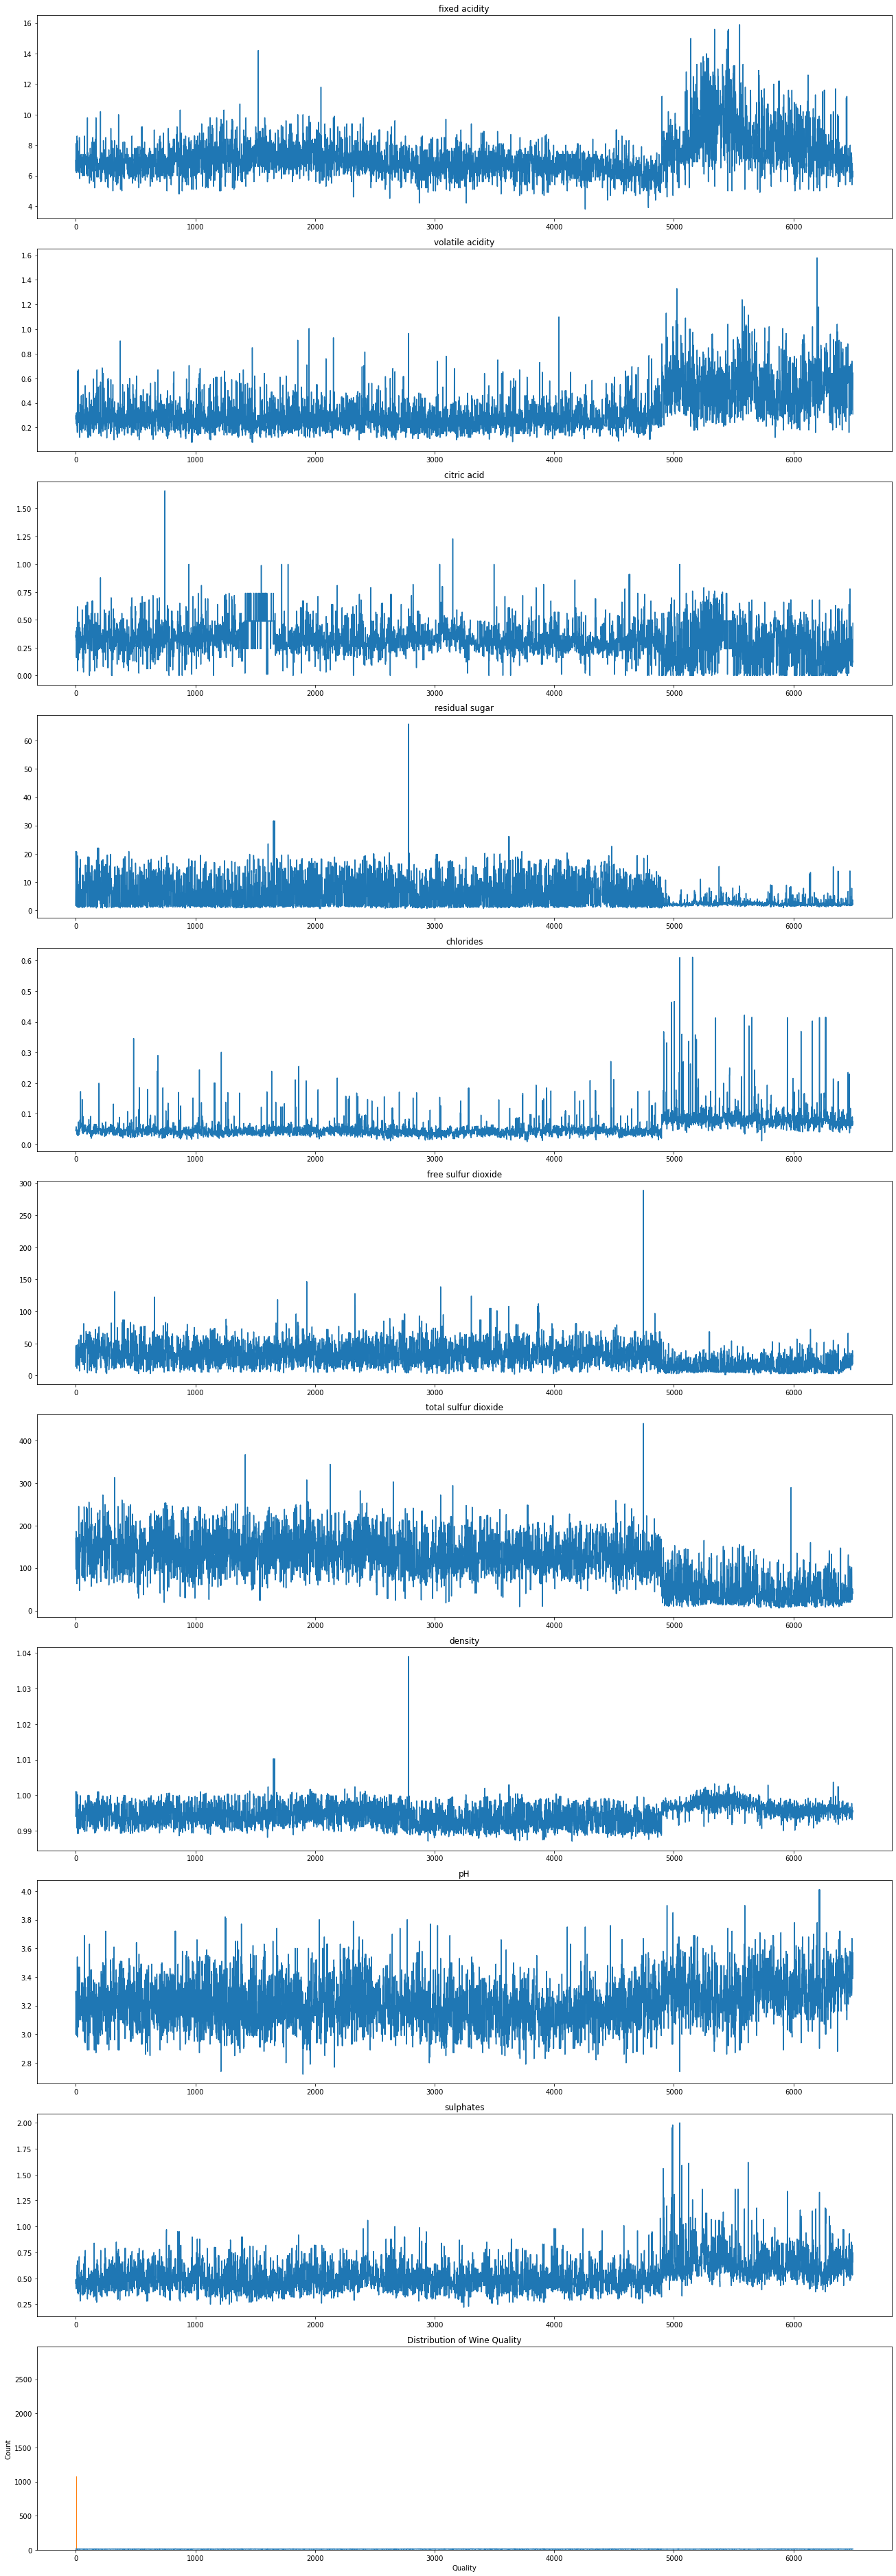

3      30
4     216
5    2138
6    2836
7    1079
8     193
9       5
Name: quality, dtype: int64

In [100]:
plt.rcParams["figure.figsize"] = (18, 52)
fig, axes = plt.subplots(nrows=11, ncols=1)

for index, column in enumerate(wine_data.columns):
    if column == 'type' or column == 'quality':
        continue
    wine_data[column].plot(ax=axes[index-1], title=column)

plt.tight_layout()

plt.rcParams["figure.figsize"] = (8, 6)
plt.hist(wine_data['quality'])
plt.title('Distribution of Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

quality_distribution = wine_data['quality'].value_counts().sort_index()

quality_distribution

In [101]:
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

wine_data_filled = wine_data.fillna(wine_data.mean())

label_encoder = LabelEncoder()
wine_data_filled['type'] = label_encoder.fit_transform(wine_data_filled['type'])

X = wine_data_filled.drop('quality', axis=1)
y = wine_data_filled['quality']

smote = SMOTE(sampling_strategy={9: 500}, k_neighbors=4, random_state=10)
X_resampled, y_resampled = smote.fit_resample(X, y)


resampled_quality_distribution = pd.Series(y_resampled).value_counts().sort_index()

resampled_quality_distribution

3      30
4     216
5    2138
6    2836
7    1079
8     193
9     500
Name: quality, dtype: int64

In [102]:
y.value_counts().sort_index()

3      30
4     216
5    2138
6    2836
7    1079
8     193
9       5
Name: quality, dtype: int64

#### SMOTE SVM by Abhijit

In [103]:
#Abhijit
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import NearMiss

#Standard scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)


smote = SMOTE( sampling_strategy={9:500,8:700,4:700,3:500},random_state= 2,k_neighbors=4)
X_resampled, y_resampled = smote.fit_resample(X, y)

y_resampled.value_counts()

def traintest_svm(X,y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)
    svm_model = SVC(kernel='rbf')  # You can choose different kernels like 'rbf', 'poly', etc.
    svm_model.fit(X_train, y_train.ravel())

    y_pred = svm_model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.2f}')
    print('Classification Report:')
    print(classification_report(y_test, y_pred))




#### Near Miss SVM by Abhijit

In [106]:


print("Before Undersampling label Counts '1': {}",y.value_counts().sort_index()) 

# Apply NearMiss
nearmiss = NearMiss(sampling_strategy={5:500,6:500,7:500})
X_NM_resampled, y_nm_resampled = nearmiss.fit_resample(X, y)
X_NM_resampled.shape


print("Before Undersampling label Counts '1': {}",y_nm_resampled.value_counts().sort_index()) 

Before Undersampling label Counts '1': {} 3      30
4     216
5    2138
6    2836
7    1079
8     193
9       5
Name: quality, dtype: int64
Before Undersampling label Counts '1': {} 3     30
4    216
5    500
6    500
7    500
8    193
9      5
Name: quality, dtype: int64


In [107]:
#Abhijit
print("SVM Performance before sampling:\n")
traintest_svm(X,y)
print("SVM Performance after SMOTE sampling:\n")
traintest_svm(X_resampled,y_resampled)
print("SVM Performance after Near Miss sampling:\n")
traintest_svm(X_NM_resampled,y_nm_resampled)

SVM Performance before sampling:

Accuracy: 0.57
Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00        43
           5       0.61      0.64      0.63       428
           6       0.54      0.73      0.62       567
           7       0.58      0.22      0.32       216
           8       0.00      0.00      0.00        39
           9       0.00      0.00      0.00         1

    accuracy                           0.57      1300
   macro avg       0.25      0.23      0.22      1300
weighted avg       0.53      0.57      0.53      1300

SVM Performance after SMOTE sampling:



c:\Users\abhij\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\abhij\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\abhij\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.58
Classification Report:
              precision    recall  f1-score   support

           3       0.84      0.81      0.82       100
           4       0.69      0.31      0.43       140
           5       0.57      0.63      0.60       428
           6       0.50      0.72      0.59       567
           7       0.49      0.16      0.24       216
           8       0.63      0.27      0.38       140
           9       0.96      1.00      0.98       100

    accuracy                           0.58      1691
   macro avg       0.67      0.56      0.58      1691
weighted avg       0.59      0.58      0.55      1691

SVM Performance after Near Miss sampling:

Accuracy: 0.60
Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.72      0.65      0.68        43
           5       0.74      0.77      0.75       100
           6       0.54      0.72      0.62       100
           7 

c:\Users\abhij\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\abhij\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\abhij\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(
    X_resampled, y_resampled, test_size=0.25, random_state=10)

X_train_original, X_test_original, y_train_original, y_test_original = train_test_split(
    X, y, test_size=0.25, random_state=10)

classifiers = {
    "Decision Tree": DecisionTreeClassifier(random_state=10),
    "SVM": SVC(random_state=10),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=10),
    "Naive Bayes": GaussianNB()
}

def train_evaluate_classifiers(classifiers, X_train, y_train, X_test, y_test):
    accuracies = {}
    for name, clf in classifiers.items():
        # Train the classifier
        clf.fit(X_train, y_train)

        # Predict on the test set
        y_pred = clf.predict(X_test)

        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        accuracies[name] = accuracy
        print(f"{name} Accuracy: {accuracy:.4f}")

    return accuracies


scaler_resampled = StandardScaler()
X_train_resampled_scaled = scaler_resampled.fit_transform(X_train_resampled)
X_test_resampled_scaled = scaler_resampled.transform(X_test_resampled)

scaler_original = StandardScaler()
X_train_original_scaled = scaler_original.fit_transform(X_train_original)
X_test_original_scaled = scaler_original.transform(X_test_original)

print("Performance on Scaled Resampled Data:")
resampled_accuracies_scaled = train_evaluate_classifiers(classifiers, X_train_resampled_scaled, y_train_resampled, X_test_resampled_scaled, y_test_resampled)

print("\nPerformance on Scaled Original Data:")
original_accuracies_scaled = train_evaluate_classifiers(classifiers, X_train_original_scaled, y_train_original, X_test_original_scaled, y_test_original)

Performance on Scaled Resampled Data:
Decision Tree Accuracy: 0.6493
SVM Accuracy: 0.5921
Logistic Regression Accuracy: 0.5675
Naive Bayes Accuracy: 0.4062

Performance on Scaled Original Data:
Decision Tree Accuracy: 0.6092
SVM Accuracy: 0.5502
Logistic Regression Accuracy: 0.5218
Naive Bayes Accuracy: 0.4203


In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid

param_grids = {
    "Decision Tree": {
        'max_depth': [None, 10, 20, 30, 40, 50],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    "SVM": {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf', 'poly']
    },
    "Logistic Regression": {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2', 'elasticnet', 'none'],
        'solver': ['saga'],
        'l1_ratio': [None, 0.2, 0.4, 0.6, 0.8]  # Use None for other penalties, specific values for 'elasticnet'
    },
    "Naive Bayes": {
        'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
    }
}

def hyperparameter_optimization(classifiers, param_grids, X_train, y_train):
    best_params = {}
    for name, clf in classifiers.items():
        print(f"Optimizing {name}...")

        # Custom iterator to skip incompatible combinations
        param_iter = (params for params in ParameterGrid(param_grids[name])
                      if not (params['penalty'] == 'elasticnet' and params['l1_ratio'] is None))

        # Grid search for hyperparameters
        grid_search = GridSearchCV(clf, param_grid=param_grids[name], cv=5, n_jobs=-1, verbose=2)
        grid_search.fit(X_train, y_train)

        # Store best parameters
        best_params[name] = grid_search.best_params_
        print(f"Best parameters for {name}: {grid_search.best_params_}\n")

    return best_params


optimized_parameters = hyperparameter_optimization(classifiers, param_grids, X_train_resampled_scaled, y_train_resampled)

Optimizing Decision Tree...
Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best parameters for Decision Tree: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}

Optimizing SVM...
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best parameters for SVM: {'C': 10, 'kernel': 'rbf'}

Optimizing Logistic Regression...
Fitting 5 folds for each of 120 candidates, totalling 600 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1291, in fit
    fold_coefs_ = Parallel(n_jobs=self.n_jobs, verbose=self.verbose, prefer=prefer)(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 63, in __call__
    return super().__call__(ite

Best parameters for Logistic Regression: {'C': 100, 'l1_ratio': None, 'penalty': 'l2', 'solver': 'saga'}

Optimizing Naive Bayes...
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameters for Naive Bayes: {'var_smoothing': 1e-06}



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [20]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

# Convert the 'type' column to numerical values using Label Encoding
label_encoder = LabelEncoder()
wine_data['type'] = label_encoder.fit_transform(wine_data['type'])

# Split the dataset into features and target
X = wine_data.drop('quality', axis=1)
y = wine_data['quality']

# Model initializations
classifiers = {
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(),
    "Logistic Regression": LogisticRegression(max_iter=10000),
    "Naive Bayes": GaussianNB()
}

# Levels of imbalance to be tested
imbalance_levels = [500, 1000, 1500, 2000]

for level in imbalance_levels:
    print(f"\n\nTesting for imbalance level: {level} synthetic samples\n{'-'*50}")

    # Apply SMOTE to generate synthetic samples for the minority class (quality = 9 and 3)
    smote = SMOTE(sampling_strategy={3: level, 9: level}, k_neighbors=4, random_state=10)
    X_resampled_scaled, y_resampled_scaled = smote.fit_resample(X, y)

    # Split the resampled data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_resampled_scaled, y_resampled_scaled, test_size=0.3, random_state=10)

    for name, clf in classifiers.items():
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        print(f"Accuracy for {name}: {accuracy:.4f}")
        print(f"Classification Report for {name}:\n", classification_report(y_test, predictions))
        print('-'*50)



Testing for imbalance level: 500 synthetic samples
--------------------------------------------------
Accuracy for Decision Tree: 0.6239
Classification Report for Decision Tree:
               precision    recall  f1-score   support

           3       0.75      0.79      0.77       145
           4       0.19      0.13      0.15        61
           5       0.63      0.64      0.64       630
           6       0.62      0.63      0.63       844
           7       0.49      0.47      0.48       333
           8       0.35      0.38      0.36        64
           9       0.97      0.98      0.97       162

    accuracy                           0.62      2239
   macro avg       0.57      0.57      0.57      2239
weighted avg       0.62      0.62      0.62      2239

--------------------------------------------------
Accuracy for SVM: 0.3868
Classification Report for SVM:
               precision    recall  f1-score   support

           3       0.95      0.13      0.23       145
     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_lo

Accuracy for Logistic Regression: 0.5257
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           3       0.64      0.20      0.31       145
           4       0.00      0.00      0.00        61
           5       0.55      0.60      0.57       630
           6       0.49      0.71      0.58       844
           7       0.39      0.10      0.16       333
           8       0.00      0.00      0.00        64
           9       0.71      0.83      0.77       162

    accuracy                           0.53      2239
   macro avg       0.40      0.35      0.34      2239
weighted avg       0.49      0.53      0.48      2239

--------------------------------------------------
Accuracy for Naive Bayes: 0.4377
Classification Report for Naive Bayes:
               precision    recall  f1-score   support

           3       0.35      0.44      0.39       145
           4       0.11      0.05      0.07        61
           5       0.51    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_lo

Accuracy for Logistic Regression: 0.5360
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           3       0.49      0.28      0.36       289
           4       0.00      0.00      0.00        61
           5       0.51      0.57      0.54       620
           6       0.51      0.65      0.57       876
           7       0.42      0.15      0.22       320
           8       0.00      0.00      0.00        69
           9       0.70      1.00      0.82       304

    accuracy                           0.54      2539
   macro avg       0.38      0.38      0.36      2539
weighted avg       0.49      0.54      0.50      2539

--------------------------------------------------
Accuracy for Naive Bayes: 0.4348
Classification Report for Naive Bayes:
               precision    recall  f1-score   support

           3       0.40      0.38      0.39       289
           4       0.05      0.03      0.04        61
           5       0.45    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_lo

Accuracy for Logistic Regression: 0.5393
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           3       0.50      0.43      0.46       405
           4       0.00      0.00      0.00        60
           5       0.51      0.49      0.50       663
           6       0.48      0.64      0.55       875
           7       0.43      0.10      0.16       328
           8       0.00      0.00      0.00        68
           9       0.72      1.00      0.83       440

    accuracy                           0.54      2839
   macro avg       0.38      0.38      0.36      2839
weighted avg       0.50      0.54      0.50      2839

--------------------------------------------------
Accuracy for Naive Bayes: 0.4678
Classification Report for Naive Bayes:
               precision    recall  f1-score   support

           3       0.45      0.47      0.46       405
           4       0.57      0.07      0.12        60
           5       0.50    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy for Logistic Regression: 0.5537
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           3       0.57      0.51      0.54       607
           4       0.00      0.00      0.00        61
           5       0.52      0.44      0.48       648
           6       0.46      0.61      0.53       868
           7       0.46      0.14      0.21       324
           8       0.00      0.00      0.00        69
           9       0.71      1.00      0.83       562

    accuracy                           0.55      3139
   macro avg       0.39      0.39      0.37      3139
weighted avg       0.52      0.55      0.52      3139

--------------------------------------------------
Accuracy for Naive Bayes: 0.4712
Classification Report for Naive Bayes:
               precision    recall  f1-score   support

           3       0.55      0.50      0.52       607
           4       0.04      0.02      0.02        61
           5       0.44    

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit